## 데이터 로드 및 정보 확인

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\HMFMPYUN.TTF' # 윈도우 OS 폰트 경로
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name() # 폰트명
matplotlib.rc('font', family=font_name)
# matplotlib이 기본적으로 사용하는 유니코드 마이너스 비활성화
plt.rc('axes', unicode_minus=False)

In [117]:
df = pd.read_csv('data/shopping_behavior_updated.csv')
df.head()



,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

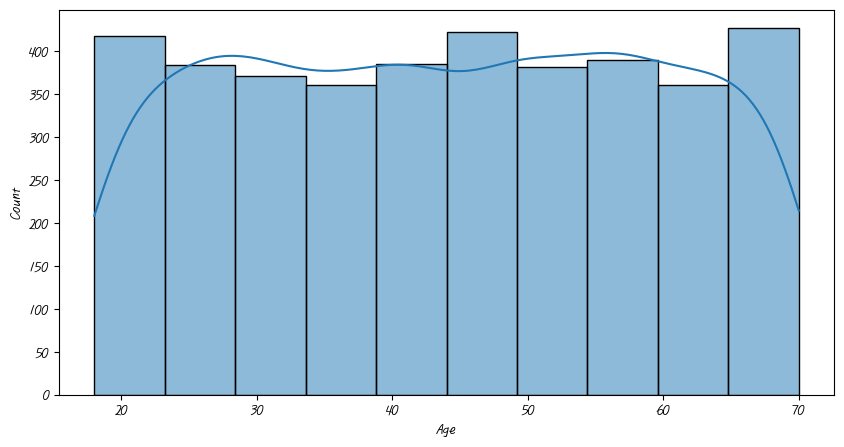

In [119]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=10, kde=True)
plt.show()

In [120]:
# 나이 분석
age_0to10 = df[(df['Age'] >= 0) & (df['Age'] < 10)].shape[0]
age_10to20 = df[(df['Age'] >= 10) & (df['Age'] < 20)].shape[0]
age_20to30 = df[(df['Age'] >= 20) & (df['Age'] < 30)].shape[0]
age_30to40 = df[(df['Age'] >= 30) & (df['Age'] < 40)].shape[0]
age_40to50 = df[(df['Age'] >= 40) & (df['Age'] < 50)].shape[0]
age_50to60 = df[(df['Age'] >= 50) & (df['Age'] < 60)].shape[0]
age_50up = df[df['Age'] >= 60].shape[0]

age_0to10 # 0
age_10to20 # 150
age_20to30 # 728
age_30to40 # 724
age_40to50 # 739
age_50to60 # 771
age_50up # 788

788

In [121]:
# 상품의 종류
df["Item Purchased"].unique()

array(['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt',
       'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt',
       'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-shirt',
       'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
      dtype=object)

In [122]:
# 성별에 따른 구매 항목별 금액
gender_item_df = pd.pivot_table(df, index='Gender', columns='Item Purchased',
                            values='Purchase Amount (USD)',
                            fill_value=0,
                            aggfunc='mean',
                            margins=True).round(2)
gender_item_df

Item Purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt,All
Gender,,,,,,,,,,,,,,,,,,,,,
Female,65.22,58.35,60.85,64.52,60.57,67.15,65.30,57.62,59.96,58.96,...,60.20,60.17,58.27,62.27,61.40,55.36,58.00,58.46,59.07,60.25
Male,58.71,60.62,60.90,61.62,56.39,59.89,58.84,58.05,61.34,57.60,...,61.64,62.27,60.88,58.27,58.80,59.81,60.96,57.36,64.66,59.54
All,60.39,59.84,60.88,62.62,57.61,62.17,60.55,57.89,60.88,58.06,...,61.14,61.60,60.08,59.51,59.55,58.19,59.93,57.70,62.91,59.76


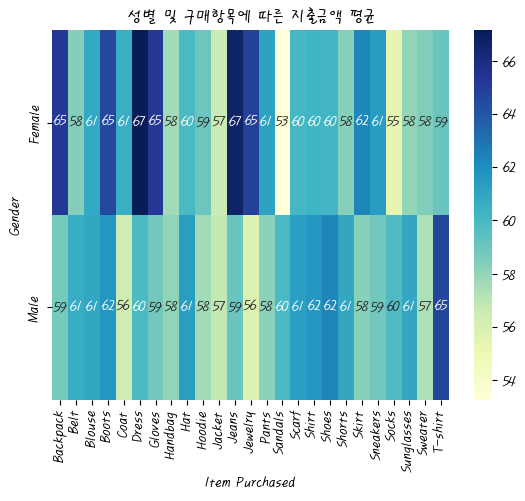

In [123]:
import seaborn as sns

sns.heatmap(gender_item_df.drop('All').drop('All', axis=1), annot=True, cmap='YlGnBu')
plt.title('성별 및 구매항목에 따른 지출금액 평균')
plt.show()

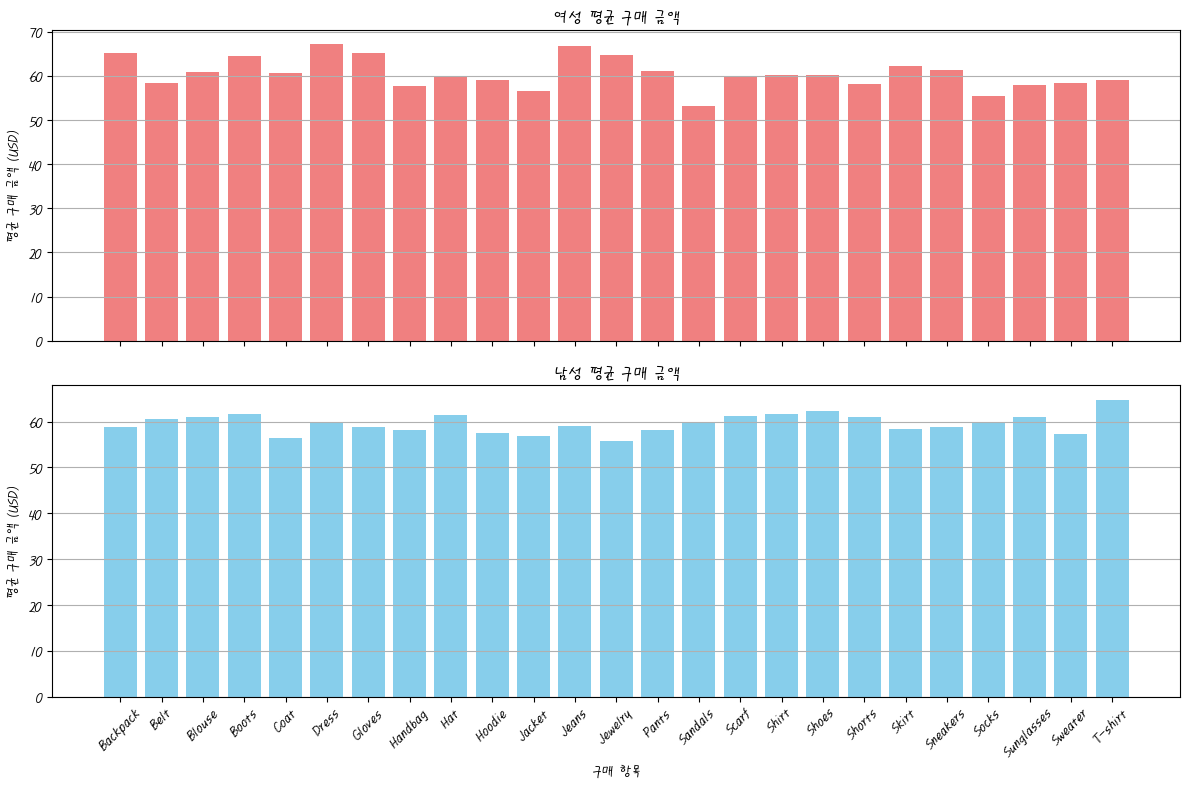

In [124]:
gender_item_plot = gender_item_df.drop('All').drop('All', axis=1)

# 성별 목록
genders = gender_item_plot.index

# 여자 남자에 대한 subplot
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# 여성 데이터
ax[0].bar(gender_item_plot.columns, gender_item_plot.loc['Female'], color='lightcoral')
ax[0].set_title('여성 평균 구매 금액')
ax[0].set_ylabel('평균 구매 금액 (USD)')
ax[0].grid(axis='y')

# 남성 데이터
ax[1].bar(gender_item_plot.columns, gender_item_plot.loc['Male'], color='skyblue')
ax[1].set_title('남성 평균 구매 금액')
ax[1].set_ylabel('평균 구매 금액 (USD)')
ax[1].set_xlabel('구매 항목')
ax[1].grid(axis='y')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [125]:
# 컬러 종류
df["Color"].unique()

array(['Gray', 'Maroon', 'Turquoise', 'White', 'Charcoal', 'Silver',
       'Pink', 'Purple', 'Olive', 'Gold', 'Violet', 'Teal', 'Lavender',
       'Black', 'Green', 'Peach', 'Red', 'Cyan', 'Brown', 'Beige',
       'Orange', 'Indigo', 'Yellow', 'Magenta', 'Blue'], dtype=object)

In [126]:
df["Color"].max()

'Yellow'

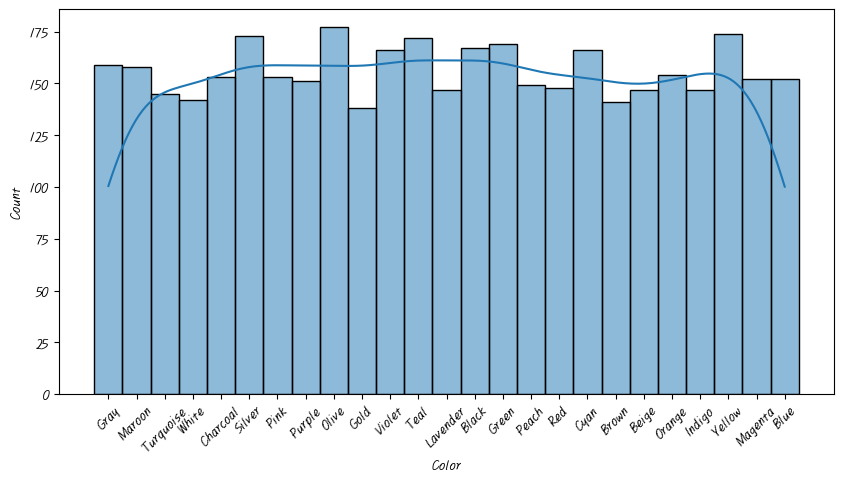

In [127]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Color'], kde=True)
plt.xticks(rotation=45)
plt.show()

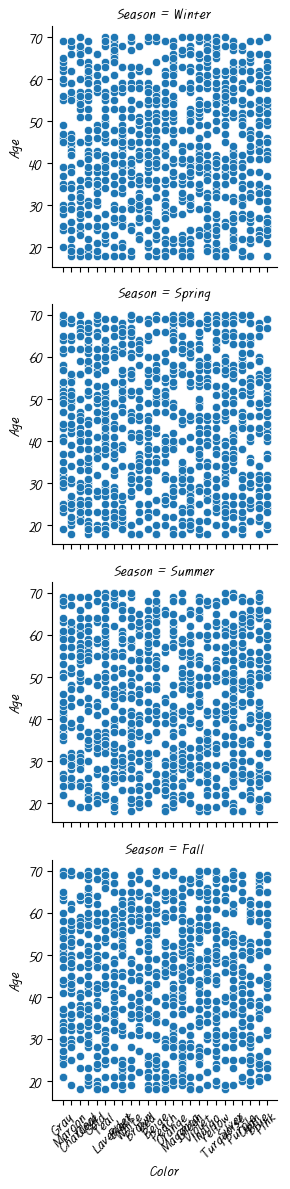

In [128]:
# 계절에 따른 구매 빈도 (아무상관 없어보임!!!!!!!!)
facet_grid = sns.FacetGrid(
    data = df, row='Season'
)
plt.xticks(rotation=45)
facet_grid.map(sns.scatterplot, 'Color', 'Age')
plt.show()

C:\Users\tj\AppData\Local\Temp\ipykernel_8084\2829868146.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_counts = df.groupby(['RatingGroup', 'Discount Applied']).size().reset_index(name='Count')


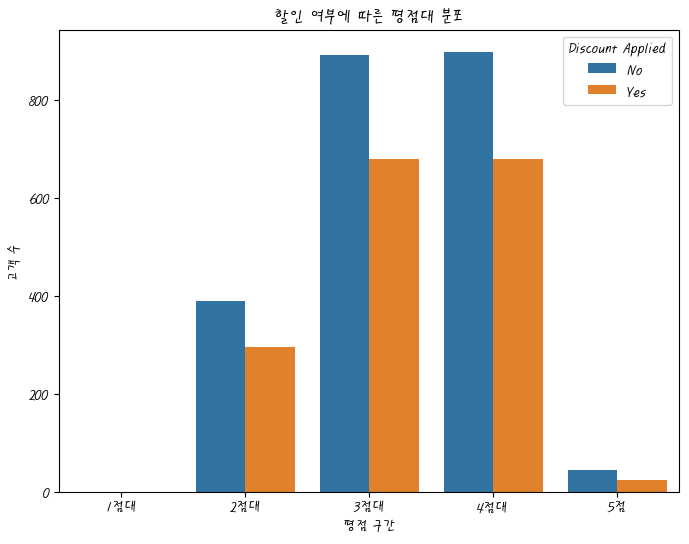

In [144]:
bins = [0.9, 1.9, 2.9, 3.9, 4.9, 5.1]  # 경계값 포함용
labels = ['1점대', '2점대', '3점대', '4점대', '5점']
df['RatingGroup'] = pd.cut(df['Review Rating'], bins=bins, labels=labels, right=True)

# 2. 할인 여부별 평점대 개수 집계
rating_counts = df.groupby(['RatingGroup', 'Discount Applied']).size().reset_index(name='Count')

# 3. 시각화
plt.figure(figsize=(8,6))
sns.barplot(data=rating_counts, x='RatingGroup', y='Count', hue='Discount Applied')
plt.title('할인 여부에 따른 평점대 분포')
plt.xlabel('평점 구간')
plt.ylabel('고객 수')
plt.show()